<a href="https://colab.research.google.com/github/enriquelerma/Data-Science-Project/blob/main/Tables_and_Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code for producing figures and statistics in *A Classroom Experiment in Monetary Policy*

Required Excel files with experiment session data:
1. 160531_1424.xlsx
2. 160531_1518.xlsx
3. 171127_1429.xlsx
4. 170531_1413.xlsx
5. 170531_1534.xlsx
6. 171127_1553.xlsx
7. 180523-Normal-Errors.xlsx
8. 180607_1400-Taylor.xlsx
9. 180607_1700-Taylor.xlsx

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline
figsize=(12,8)

## Load data and manage

In [ ]:
import pandas as pd
import numpy as np

# Load data from dual mandate, uniform errors session: May 2016
data1 = pd.read_excel('DualMandate1.xlsx', skiprows=2)
data2 = pd.read_excel('DualMandate2.xlsx', skiprows=2)

# Drop rows with missing Period entries
for i in data1.index:
    if type(data1.loc[i, 'Period']) is str:
        data1.loc[i, 'Period'] = np.nan

for i in data2.index:
    if type(data2.loc[i, 'Period']) is str:
        data2.loc[i, 'Period'] = np.nan

# Remove all rows with any NaN (i.e. those with non‑numeric Period)
data1 = data1.dropna()
data2 = data2.dropna()

# Mark session and select columns
data1['Session'] = 1
data1 = data1[['Period','Subject','Group','Session','epsilon','r',
               'piActual','piE','piEAvg','y','score','TimeOKCentralBankChoiceOK']]
data1 = data1.astype(float)
data1['CB'] = data1['piE'] == -1

data2['Session'] = 2
data2 = data2[['Period','Subject','Group','Session','epsilon','r',
               'piActual','piE','piEAvg','y','score','TimeOKCentralBankChoiceOK']]
data2 = data2.astype(float)
data2['CB'] = data2['piE'] == -1

# Offset IDs to avoid overlap
data2['Subject'] += 30
data2['Group']   += 6

# Merge and sort
data_dual = pd.concat([data1, data2], ignore_index=True)
data_dual = data_dual.sort_values(['Period','Group','CB'], ascending=[True, True, False])
data_dual = data_dual.reset_index(drop=True)

# Keep only periods 1–10
data_dual = data_dual[data_dual['Period'] < 11]

# Inspect top and bottom
print(data_dual[['Period','Subject','Group','Session','CB','epsilon','piActual','piE']].head(10))
print('\n', data_dual[['Period','Subject','Group','Session','CB','epsilon','piActual','piE']].tail(10))

# Model parameters
lambd_dual = 0.1
alpha = 2
beta  = 1
kappa = 0.25
piStar = 2.5

# Compute optimal vs. rational outcomes
data_dual['rOpt'] = alpha/beta - kappa/beta/(kappa**2 + lambd_dual)*(piStar - data_dual['piEAvg']) + data_dual['epsilon']/beta
data_dual['rRE']  = alpha/beta + data_dual['epsilon']/beta

data_dual['yOpt'] = alpha - beta*data_dual['rOpt'] + data_dual['epsilon']
data_dual['yRE']  = alpha - beta*data_dual['rRE'] + data_dual['epsilon']

data_dual['piOpt'] = data_dual['piEAvg'] + kappa*data_dual['yOpt']
data_dual['piRE']  = piStar + kappa*data_dual['yRE']

data_dual['Error'] = data_dual['piEAvg'] - data_dual['piActual']
data_dual['Zero']  = 0


   Period  Subject  Group  Session     CB  epsilon  piActual  piE
0     1.0      2.0    1.0      1.0   True    -0.54     1.565 -1.0
1     1.0      1.0    1.0      1.0  False    -0.54     1.565  1.0
2     1.0      3.0    1.0      1.0  False    -0.54     1.565  0.2
3     1.0      4.0    1.0      1.0  False    -0.54     1.565  2.5
4     1.0      5.0    1.0      1.0  False    -0.54     1.565  2.1
5     1.0     32.0    7.0      2.0   True    -0.05     2.000 -1.0
6     1.0     31.0    7.0      2.0  False    -0.05     2.000  2.5
7     1.0     33.0    7.0      2.0  False    -0.05     2.000  3.0
8     1.0     34.0    7.0      2.0  False    -0.05     2.000  2.0
9     1.0     35.0    7.0      2.0  False    -0.05     2.000  1.5

     Period  Subject  Group  Session     CB  epsilon  piActual   piE
90    10.0      2.0    1.0      1.0   True    -0.57    1.9675 -1.00
91    10.0      1.0    1.0      1.0  False    -0.57    1.9675  2.29
92    10.0      3.0    1.0      1.0  False    -0.57    1.9675  2.20


In [ ]:
# Load data from inflation targeting, uniform erors session: May 2017
data3 = pd.read_excel('InflationTarg.xlsx', skiprows=2)

# Drop rows with missing data and remove irrelevant columns
for i in data3.index:
    if type(data3['Period'][i]) == str:
        data3.loc[i,'Period'] = np.nan

data3 = data3.dropna()
data3['Session'] = 1
data3 = data3[['Period','Subject','Group','Session','epsilon','r','piActual','piE','piEAvg','y','score','TimeOKCentralBankChoiceOK']]
data3 = data3.astype(float)
data3['CB'] = data3['piE'] == -1

# Merge and sort
data_target = data3.copy()
data_target = data_target.sort_values(['Period','Group','CB'],ascending=[True,True,False])
data_target = data_target.reset_index(drop=True)

# Print top and bottom
print(data_target[['Period','Subject','Group','Session','CB','epsilon','piActual','piE']].head(10))
print('\n',data_target[['Period','Subject','Group','Session','CB','epsilon','piActual','piE']].tail(10))

lambd_target = 0
alpha = 2
beta  = 1
kappa = 0.25

data_target['rOpt'] = alpha / beta - kappa/beta/(kappa**2 + lambd_target)*(2.5 -data_target['piEAvg'] )  + 1/beta*data_target['epsilon']
data_target['rRE'] = alpha / beta + 1/beta*data_target['epsilon']
data_target['yOpt'] = alpha - beta * data_target['rOpt'] + data_target['epsilon']
data_target['yRE'] = alpha - beta * data_target['rRE'] + data_target['epsilon']
data_target['piOpt'] = data_target['piEAvg'] + kappa *data_target['yOpt']
data_target['piRE'] = 2.5 + kappa *data_target['yRE']
data_target['Error'] = data_target['piEAvg'] - data_target['piActual']
data_target['Zero'] = 0

   Period  Subject  Group  Session     CB  epsilon  piActual   piE
0     1.0      3.0    1.0      1.0   True    -1.17    2.3825 -1.00
1     1.0      1.0    1.0      1.0  False    -1.17    2.3825  2.50
2     1.0      2.0    1.0      1.0  False    -1.17    2.3825  2.00
3     1.0      4.0    1.0      1.0  False    -1.17    2.3825  3.50
4     1.0      5.0    1.0      1.0  False    -1.17    2.3825  2.50
5     2.0      3.0    1.0      1.0   True     0.09    2.5225 -1.00
6     2.0      1.0    1.0      1.0  False     0.09    2.5225  2.50
7     2.0      2.0    1.0      1.0  False     0.09    2.5225  2.20
8     2.0      4.0    1.0      1.0  False     0.09    2.5225  3.00
9     2.0      5.0    1.0      1.0  False     0.09    2.5225  2.45

     Period  Subject  Group  Session     CB  epsilon  piActual   piE
40     9.0      3.0    1.0      1.0   True    -0.55    2.6575 -1.00
41     9.0      1.0    1.0      1.0  False    -0.55    2.6575  2.88
42     9.0      2.0    1.0      1.0  False    -0.55    2.

In [ ]:
print('Total subjects:           ',len(data_target.Subject.unique())+len(data_dual.Subject.unique()))
print('Total Groups:             ',len(data_target.Group.unique())+len(data_dual.Group.unique()))

print('Number of target (uniform) subjects:',len(data_target.Subject.unique()))
print('Number of target (uniform) Groups  :',len(data_target.Group.unique()))

print('Number of dual   (uniform) subjects:',len(data_dual.Subject.unique()))
print('Number of dual   (uniform) Groups  :',len(data_dual.Group.unique()))



Total subjects:            15
Total Groups:              3
Number of target (uniform) subjects: 5
Number of target (uniform) Groups  : 1
Number of dual   (uniform) subjects: 10
Number of dual   (uniform) Groups  : 2


## Plot all group-level values for each period under each regime

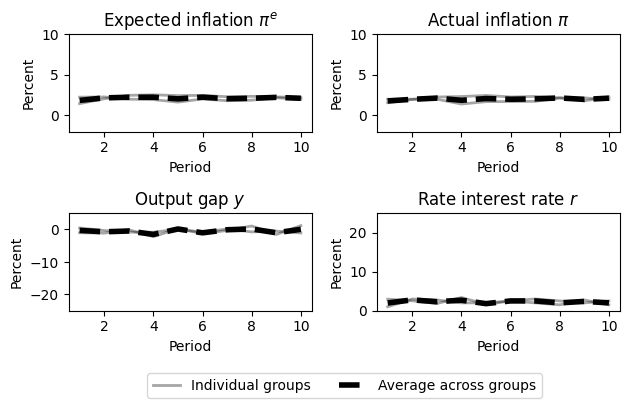

In [ ]:
# Individual groups in dual mandate regime
fig = plt.figure()
ax0 = fig.add_subplot(1,1,1)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax0.set_frame_on(False)
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax0.plot(0, 0,'-k',lw=2,alpha=0.35)
ax0.plot(0, 0,'--k',lw=4,alpha=1)
lgd = ax0.legend(['Individual groups','Average across groups'],ncol=2,loc='upper center', bbox_to_anchor=(0.5,-0.20))

for k in data_dual['Group'].unique():
    ax1.plot(np.arange(1,11),data_dual[(data_dual['Group']==k) & (data_dual['piE']==-1)].piEAvg,'k',lw=2,alpha=0.35)
    ax2.plot(np.arange(1,11),data_dual[(data_dual['Group']==k) & (data_dual['piE']==-1)].piActual,'k',lw=2,alpha=0.35)
    ax3.plot(np.arange(1,11),data_dual[(data_dual['Group']==k) & (data_dual['piE']==-1)].y,'k',lw=2,alpha=0.35)
    ax4.plot(np.arange(1,11),data_dual[(data_dual['Group']==k) & (data_dual['piE']==-1)].r,'k',lw=2,alpha=0.35)

ax1.plot(np.arange(1,11),data_dual[(data_dual['piE']==-1)][['Period','piEAvg']].groupby('Period').mean(),'--k',lw=4,alpha=1)
ax2.plot(np.arange(1,11),data_dual[(data_dual['piE']==-1)][['Period','piActual']].groupby('Period').mean(),'--k',lw=4,alpha=1)
ax3.plot(np.arange(1,11),data_dual[(data_dual['piE']==-1)][['Period','y']].groupby('Period').mean(),'--k',lw=4,alpha=1)
ax4.plot(np.arange(1,11),data_dual[(data_dual['piE']==-1)][['Period','r']].groupby('Period').mean(),'--k',lw=4,alpha=1)

ax1.set_title('Expected inflation $\pi^e$')
ax2.set_title('Actual inflation $\pi$')
ax3.set_title('Output gap $y$')
ax4.set_title('Rate interest rate $r$')

ax1.set_xlabel('Period')
ax2.set_xlabel('Period')
ax3.set_xlabel('Period')
ax4.set_xlabel('Period')

ax1.set_ylabel('Percent')
ax2.set_ylabel('Percent')
ax3.set_ylabel('Percent')
ax4.set_ylabel('Percent')

ax1.set_ylim([-2,10])
ax2.set_ylim([-2,10])
ax3.set_ylim([-25,5])
ax4.set_ylim([0,25])

fig.tight_layout()
plt.savefig('fig_dual_all_groups.png',bbox_inches='tight',dpi=120)

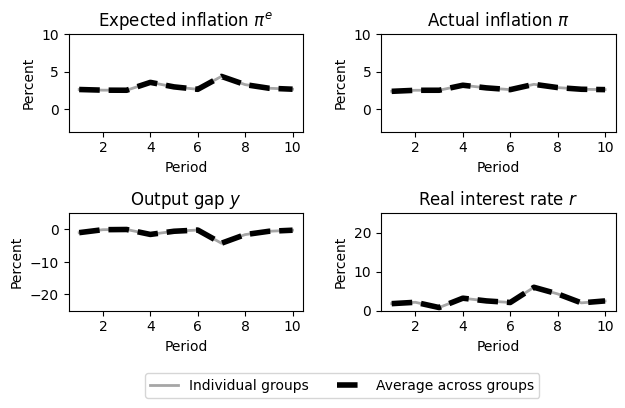

In [ ]:
# Individual groups in inflation target regime
fig = plt.figure()
ax0 = fig.add_subplot(1,1,1)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax0.set_frame_on(False)
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax0.plot(0, 0,'-k',lw=2,alpha=0.35)
ax0.plot(0, 0,'--k',lw=4,alpha=1)
lgd = ax0.legend(['Individual groups','Average across groups'],ncol=2,loc='upper center', bbox_to_anchor=(0.5,-0.20))

for k in data_target['Group'].unique():
#     print(k)
    ax1.plot(np.arange(1,11),data_target[(data_target['Group']==k) & (data_target['piE']==-1)].piEAvg,'k',lw=2,alpha=0.35)
    ax2.plot(np.arange(1,11),data_target[(data_target['Group']==k) & (data_target['piE']==-1)].piActual,'k',lw=2,alpha=0.35)
    ax3.plot(np.arange(1,11),data_target[(data_target['Group']==k) & (data_target['piE']==-1)].y,'k',lw=2,alpha=0.35)
    ax4.plot(np.arange(1,11),data_target[(data_target['Group']==k) & (data_target['piE']==-1)].r,'k',lw=2,alpha=0.35)

ax1.plot(np.arange(1,11),data_target[(data_target['piE']==-1)][['Period','piEAvg']].groupby('Period').mean(),'--k',lw=4,alpha=1)
ax2.plot(np.arange(1,11),data_target[(data_target['piE']==-1)][['Period','piActual']].groupby('Period').mean(),'--k',lw=4,alpha=1)
ax3.plot(np.arange(1,11),data_target[(data_target['piE']==-1)][['Period','y']].groupby('Period').mean(),'--k',lw=4,alpha=1)
ax4.plot(np.arange(1,11),data_target[(data_target['piE']==-1)][['Period','r']].groupby('Period').mean(),'--k',lw=4,alpha=1)

ax1.set_title('Expected inflation $\pi^e$')
ax2.set_title('Actual inflation $\pi$')
ax3.set_title('Output gap $y$')
ax4.set_title('Real interest rate $r$')

ax1.set_xlabel('Period')
ax2.set_xlabel('Period')
ax3.set_xlabel('Period')
ax4.set_xlabel('Period')

ax1.set_ylabel('Percent')
ax2.set_ylabel('Percent')
ax3.set_ylabel('Percent')
ax4.set_ylabel('Percent')

ax1.set_ylim([-3,10])
ax2.set_ylim([-3,10])
ax3.set_ylim([-25,5])
ax4.set_ylim([0,25])

fig.tight_layout()
plt.savefig('fig_target_all_groups.png',bbox_inches='tight',dpi=120)

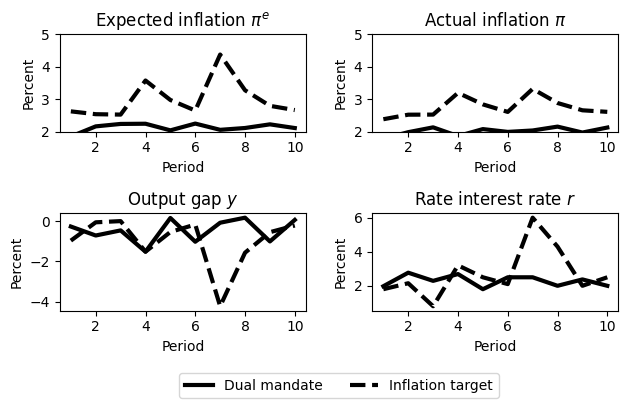

In [ ]:
# Average across groups in each regime
fig = plt.figure()
ax0 = fig.add_subplot(1,1,1)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax0.set_frame_on(False)
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax0.plot(0, 0,'-k',lw=3,alpha=1)
ax0.plot(0, 0,'--k',lw=3,alpha=1)
lgd = ax0.legend(['Dual mandate','Inflation target'],ncol=2,loc=9, bbox_to_anchor=(0.5,-0.20))

ax1.plot(np.arange(1,11),data_dual[(data_dual['piE']==-1)][['Period','piEAvg']].groupby('Period').mean(),'-k',lw=3,alpha=1)
ax2.plot(np.arange(1,11),data_dual[(data_dual['piE']==-1)][['Period','piActual']].groupby('Period').mean(),'-k',lw=3,alpha=1)
ax3.plot(np.arange(1,11),data_dual[(data_dual['piE']==-1)][['Period','y']].groupby('Period').mean(),'-k',lw=3,alpha=1)
ax4.plot(np.arange(1,11),data_dual[(data_dual['piE']==-1)][['Period','r']].groupby('Period').mean(),'-k',lw=3,alpha=1)


ax1.plot(np.arange(1,11),data_target[(data_target['piE']==-1)][['Period','piEAvg']].groupby('Period').mean(),'--k',lw=3,alpha=1)
ax2.plot(np.arange(1,11),data_target[(data_target['piE']==-1)][['Period','piActual']].groupby('Period').mean(),'--k',lw=3,alpha=1)
ax3.plot(np.arange(1,11),data_target[(data_target['piE']==-1)][['Period','y']].groupby('Period').mean(),'--k',lw=3,alpha=1)
ax4.plot(np.arange(1,11),data_target[(data_target['piE']==-1)][['Period','r']].groupby('Period').mean(),'--k',lw=3,alpha=1)

ax1.set_title('Expected inflation $\pi^e$')
ax2.set_title('Actual inflation $\pi$')
ax3.set_title('Output gap $y$')
ax4.set_title('Rate interest rate $r$')

ax1.set_xlabel('Period')
ax2.set_xlabel('Period')
ax3.set_xlabel('Period')
ax4.set_xlabel('Period')

ax1.set_ylabel('Percent')
ax2.set_ylabel('Percent')
ax3.set_ylabel('Percent')
ax4.set_ylabel('Percent')

ax1.set_ylim([2,5])
ax2.set_ylim([2,5])

fig.tight_layout()
plt.savefig('fig_dual_and_target.png',bbox_inches='tight',dpi=120)

## Plot average central bank loss for both regimes

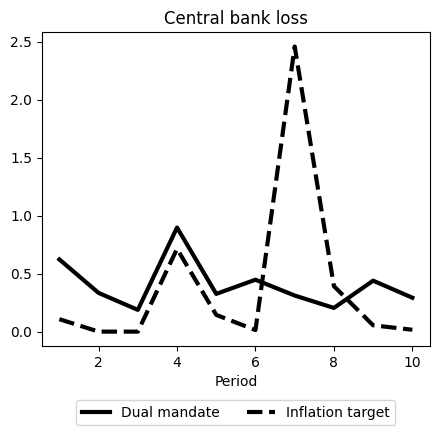

In [ ]:
data_dual_cb = data_dual[data_dual['piE']==-1].copy()
data_target_cb = data_target[data_target['piE']==-1].copy()

data_dual_cb['Loss'] = (data_dual_cb['piActual']-piStar)**2 + lambd_dual*data_dual_cb['y']**2
data_target_cb['Loss'] = (data_target_cb['piActual']-piStar)**2 + lambd_dual*data_target_cb['y']**2


loss_dual = data_dual_cb[['Period','Loss']].groupby('Period').mean()
loss_target = data_target_cb[['Period','Loss']].groupby('Period').mean()

scale = 0.75
fig = plt.figure(figsize=(6*scale,6*scale))
ax1 = fig.add_subplot(1,1,1)

ax1.plot(np.arange(1,11),loss_dual,'-k',lw=3,alpha=1)
ax1.plot(np.arange(1,11),loss_target,'--k',lw=3,alpha=1)

ax1.set_title('Central bank loss')#,fontsize=12)
ax1.legend(['Dual mandate','Inflation target'],loc='upper center',ncol=2, bbox_to_anchor=(0.5, -0.15))#,fontsize=12)

ax1.set_xlabel('Period')

fig.tight_layout()
plt.savefig('fig_dual_and_target_loss.png',bbox_inches='tight',dpi=120)

## Plot outcomes for individual groups

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_group(group_number, which, filename=None, ylim1=None, ylim2=None, ylim3=None):
    '''Function for plotting group outcomes and saving figure to png file'''

    # select the appropriate DataFrame for your data
    if which == 'dual':
        frame = data_dual
    else:
        frame = data_target

    scale = 0.48
    fig = plt.figure(figsize=(12*scale, 16*scale))

    # invisible top axes for legend
    ax0 = fig.add_subplot(1,1,1)
    ax0.set_frame_on(False)
    ax0.get_xaxis().set_visible(False)
    ax0.get_yaxis().set_visible(False)
    ax0.plot(0, 0, '-k', lw=4)
    ax0.plot(0, 0, ':k', lw=3)
    ax0.plot(0, 0, '--k', lw=3)
    ax0.legend(['Actual', 'Optimal on $\pi^e$', 'Optimal RE'],
               loc='upper center', bbox_to_anchor=(0.5, -0.075), ncol=3)

    # four subplots for r, pi, y, and error
    ax1 = fig.add_subplot(4,1,1)
    ax2 = fig.add_subplot(4,1,2)
    ax3 = fig.add_subplot(4,1,3)
    ax4 = fig.add_subplot(4,1,4)

    x = np.arange(1, 11)
    mask = (frame['Group'] == group_number) & (frame['piE'] == -1)

    # real interest rate
    ax1.plot(x, frame.loc[mask, 'r'],    '-k', lw=4)
    ax1.plot(x, frame.loc[mask, 'rOpt'], ':k', lw=3)
    ax1.plot(x, frame.loc[mask, 'rRE'],  '--k', lw=3)
    if ylim1 is not None:
        ax1.set_ylim(ylim1)
    ax1.set_title('Real interest $r$')
    ax1.set_xlabel('Period')
    ax1.set_ylabel('Percent')

    # inflation
    ax2.plot(x, frame.loc[mask, 'piActual'], '-k', lw=4)
    ax2.plot(x, frame.loc[mask, 'piOpt'],    ':k', lw=3)
    ax2.plot(x, frame.loc[mask, 'piRE'],     '--k', lw=3)
    if ylim2 is not None:
        ax2.set_ylim(ylim2)
    ax2.set_title('Inflation $\\pi$')
    ax2.set_xlabel('Period')
    ax2.set_ylabel('Percent')

    # output gap
    ax3.plot(x, frame.loc[mask, 'y'],    '-k', lw=4)
    ax3.plot(x, frame.loc[mask, 'yOpt'], ':k', lw=3)
    ax3.plot(x, frame.loc[mask, 'yRE'],  '--k', lw=3)
    if ylim3 is not None:
        ax3.set_ylim(ylim3)
    ax3.set_title('Output gap $y$')
    ax3.set_xlabel('Period')
    ax3.set_ylabel('Percent')

    # forecast error
    ax4.plot(x, frame.loc[mask, 'Error'], '-k', lw=3)
    ax4.plot(x, frame.loc[mask, 'Zero'],  '--k', lw=3)
    ax4.set_title('Inflation forecast error $\\pi^e - \\pi$')
    ax4.set_xlabel('Period')
    ax4.set_ylabel('Percent')

    plt.tight_layout()
    if filename:
        plt.savefig(filename, bbox_inches='tight', dpi=120)
    plt.show()


Group 1


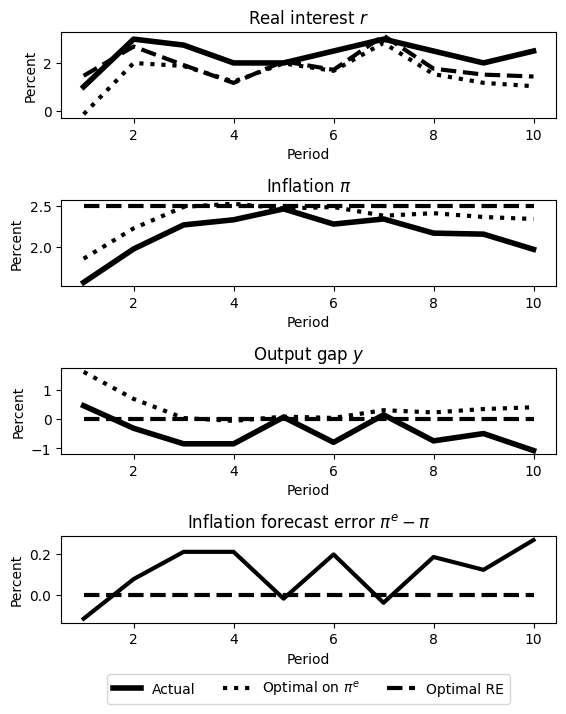

Group 7


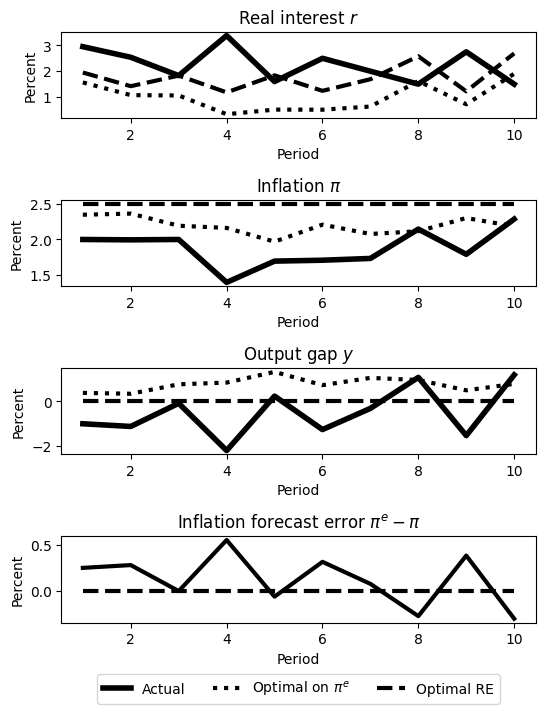

In [ ]:
# Plot for each of the dual‐mandate groups in your data_dual (groups 1 and 7)
for g in [1, 7]:
    print(f'Group {g}')
    plot_group(
        group_number=g,
        which='dual',
        filename=f'fig_dual_group_{g}.png'
    )


Group 1


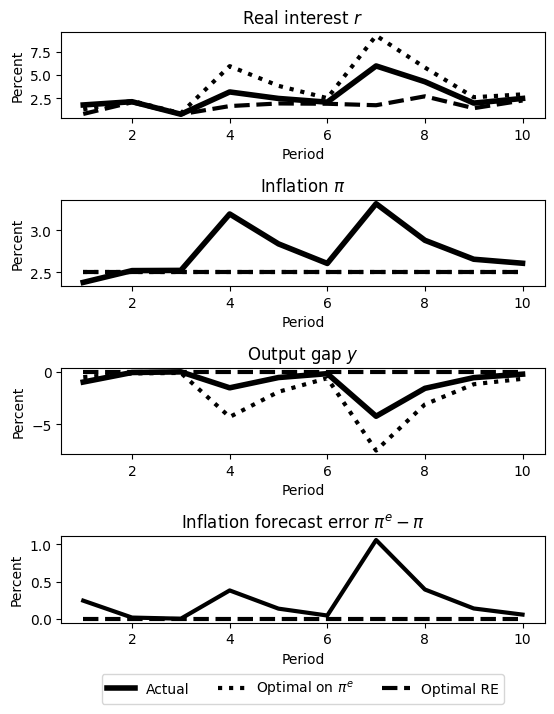

In [ ]:
# Plot for each of the inflation‑targeting groups in your data_target
for g in [1]:
    print(f'Group {g}')
    plot_group(
        group_number=g,
        which='target',
        filename=f'fig_target_group_{g}.png'
    )



# Make tables with RMSE stats

Compute relevant RMSE stats and export to .tex files.

In [ ]:
data = pd.concat([data_dual,data_target],axis=0).sort_values('Period')
data = data.reset_index(drop=True)

data = data[data['piE']==-1]

def compute_rmse(df,key1,key2):
    '''Function for computing rmse variable [key1] v [key2] in dataframe [df]'''

    periods1_5 = ((df[df['Period']<6][key1] - df[df['Period']<6][key2])**2).mean()**0.5
    periods6_10 = ((df[df['Period']>=5][key1] - df[df['Period']>=5][key2])**2).mean()**0.5
    periods_all = ((df[key1] - df[key2])**2).mean()**0.5

    return periods1_5, periods6_10, periods_all

In [ ]:
key1,key2 = ['piEAvg','piActual']

rmse_dual = compute_rmse(data_dual,key1,key2)
rmse_target = compute_rmse(data_target,key1,key2)
rmse_both = compute_rmse(data,key1,key2)


with open('table_rmse_inflation.tex', 'w') as nf:

    nf.write('\\begin{tabular}{l|ccc} & Dual Mandate & Inflation target \\\\\\hline\n\\\\\n')
    nf.write('Periods 1--5 & '+str(round(rmse_dual[0],2))+' & '+str(round(rmse_target[0],2))+'  \\\\\n\\\\\n')
    nf.write('Periods 6--10 & '+str(round(rmse_dual[1],2))+' & '+str(round(rmse_target[1],2))+'  \\\\\n')
    nf.write('\\end{tabular}')

key1,key2 = ['r','rOpt']

rmse_dual = compute_rmse(data_dual,key1,key2)
rmse_target = compute_rmse(data_target,key1,key2)
rmse_both = compute_rmse(data,key1,key2)


with open('table_rmse_interest_opt.tex', 'w') as nf:

    nf.write('\\begin{tabular}{l|ccc} & Dual Mandate & Inflation target \\\\\\hline\n\\\\\n')
    nf.write('Periods 1--5 & '+str(round(rmse_dual[0],2))+' & '+str(round(rmse_target[0],2))+'  \\\\\n\\\\\n')
    nf.write('Periods 6--10 & '+str(round(rmse_dual[1],2))+' & '+str(round(rmse_target[1],2))+'  \\\\\n')
    nf.write('\\end{tabular}')

key1,key2 = ['r','rRE']

rmse_dual = compute_rmse(data_dual,key1,key2)
rmse_target = compute_rmse(data_target,key1,key2)
rmse_both = compute_rmse(data,key1,key2)


with open('table_rmse_interest_RE.tex', 'w') as nf:

    nf.write('\\begin{tabular}{l|ccc} & Dual Mandate & Inflation target \\\\\\hline\n\\\\\n')
    nf.write('Periods 1--5 & '+str(round(rmse_dual[0],2))+' & '+str(round(rmse_target[0],2))+'  \\\\\n\\\\\n')
    nf.write('Periods 6--10 & '+str(round(rmse_dual[1],2))+' & '+str(round(rmse_target[1],2))+'  \\\\\n')
    nf.write('\\end{tabular}')

key1,key2 = ['y','yOpt']

rmse_dual = compute_rmse(data_dual,key1,key2)
rmse_target = compute_rmse(data_target,key1,key2)
rmse_both = compute_rmse(data,key1,key2)

with open('table_rmse_output_opt.tex', 'w') as nf:

    nf.write('\\begin{tabular}{l|ccc} & Dual Mandate & Inflation target \\\\\\hline\n\\\\\n')
    nf.write('Periods 1--5 & '+str(round(rmse_dual[0],2))+' & '+str(round(rmse_target[0],2))+'  \\\\\n\\\\\n')
    nf.write('Periods 6--10 & '+str(round(rmse_dual[1],2))+' & '+str(round(rmse_target[1],2))+'  \\\\\n')
    nf.write('\\end{tabular}')

key1,key2 = ['y','Zero']

rmse_dual = compute_rmse(data_dual,key1,key2)
rmse_target = compute_rmse(data_target,key1,key2)
rmse_both = compute_rmse(data,key1,key2)

with open('table_rmse_output_RE.tex', 'w') as nf:

    nf.write('\\begin{tabular}{l|ccc} & Dual Mandate & Inflation target \\\\\\hline\n\\\\\n')
    nf.write('Periods 1--5 & '+str(round(rmse_dual[0],2))+' & '+str(round(rmse_target[0],2))+'  \\\\\n\\\\\n')
    nf.write('Periods 6--10 & '+str(round(rmse_dual[1],2))+' & '+str(round(rmse_target[1],2))+'  \\\\\n')
    nf.write('\\end{tabular}')

## Sample presentation of group outcomes for in-class discussion

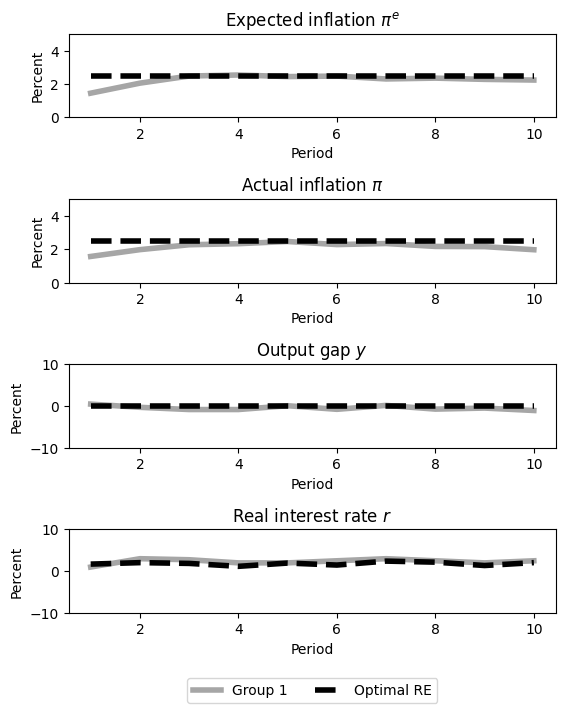

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

scale = 0.48
fig = plt.figure(figsize=(12*scale, 16*scale))

ax0 = fig.add_subplot(1,1,1)
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax0.set_frame_on(False)
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)

# only Group 1 of data_dual
groups = [1]
colors = ['k']

for k, g in enumerate(groups):
    ax0.plot(0, 0, lw=4, alpha=0.35, color=colors[k], label=f'Group {int(g)}')
    mask = (data_dual['Group'] == g) & (data_dual['piE'] == -1)
    x = np.arange(1, 11)
    ax1.plot(x, data_dual.loc[mask, 'piEAvg'],   lw=4, alpha=0.35, color=colors[k])
    ax2.plot(x, data_dual.loc[mask, 'piActual'], lw=4, alpha=0.35, color=colors[k])
    ax3.plot(x, data_dual.loc[mask, 'y'],        lw=4, alpha=0.35, color=colors[k])
    ax4.plot(x, data_dual.loc[mask, 'r'],        lw=4, alpha=0.35, color=colors[k])

# baseline: Optimal RE
piStar = 2.5
ax0.plot(0, 0, 'k--', lw=4, alpha=1, label='Optimal RE')
x = np.arange(1, 11)
ax1.plot(x, piStar + 0*x, '--k', lw=4, alpha=1)
ax2.plot(x, piStar + 0*x, '--k', lw=4, alpha=1)
ax3.plot(x, 0      + 0*x, '--k', lw=4, alpha=1)
mean_rRE = data_dual[data_dual['piE']==-1].groupby('Period')['rRE'].mean()
ax4.plot(x, mean_rRE.values, '--k', lw=4, alpha=1)

ax0.legend(ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.10))

ax1.set_title('Expected inflation $\\pi^e$')
ax2.set_title('Actual inflation $\\pi$')
ax3.set_title('Output gap $y$')
ax4.set_title('Real interest rate $r$')

for ax in (ax1, ax2, ax3, ax4):
    ax.set_xlabel('Period')
    ax.set_ylabel('Percent')

ax1.set_ylim([0, 5])
ax2.set_ylim([0, 5])
ax3.set_ylim([-10, 10])
ax4.set_ylim([-10, 10])

fig.tight_layout()
plt.savefig('fig_discussion_example_dual_group1.png', bbox_inches='tight', dpi=120)
plt.show()


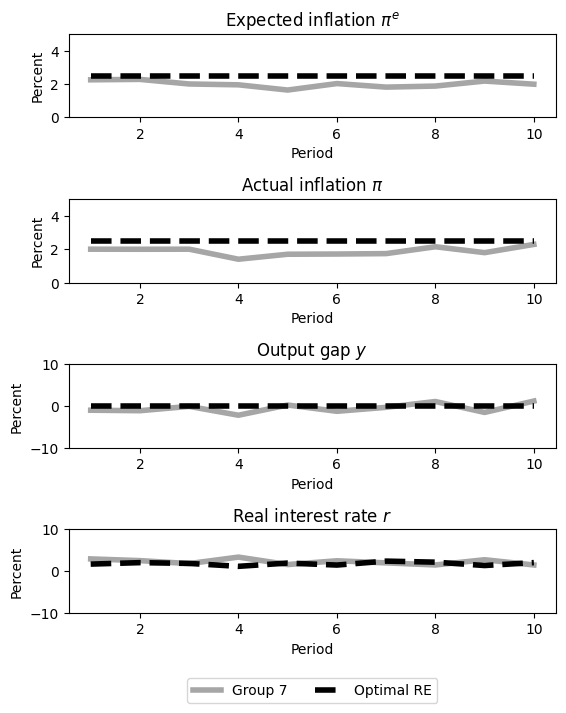

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

scale = 0.48
fig = plt.figure(figsize=(12*scale, 16*scale))

ax0 = fig.add_subplot(1,1,1)
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax0.set_frame_on(False)
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)

# only the second group (Group 7)
groups = [7]
colors = ['k']

for k, g in enumerate(groups):
    ax0.plot(0, 0, lw=4, alpha=0.35, color=colors[k], label=f'Group {g}')
    mask = (data_dual['Group'] == g) & (data_dual['piE'] == -1)
    x = np.arange(1, 11)
    ax1.plot(x, data_dual.loc[mask, 'piEAvg'],   lw=4, alpha=0.35, color=colors[k])
    ax2.plot(x, data_dual.loc[mask, 'piActual'], lw=4, alpha=0.35, color=colors[k])
    ax3.plot(x, data_dual.loc[mask, 'y'],        lw=4, alpha=0.35, color=colors[k])
    ax4.plot(x, data_dual.loc[mask, 'r'],        lw=4, alpha=0.35, color=colors[k])

# baseline: Optimal RE
piStar = 2.5
ax0.plot(0, 0, 'k--', lw=4, alpha=1, label='Optimal RE')
x = np.arange(1, 11)
ax1.plot(x, piStar + 0*x, '--k', lw=4, alpha=1)
ax2.plot(x, piStar + 0*x, '--k', lw=4, alpha=1)
ax3.plot(x, 0      + 0*x, '--k', lw=4, alpha=1)
mean_rRE = data_dual[data_dual['piE']==-1].groupby('Period')['rRE'].mean()
ax4.plot(x, mean_rRE.values, '--k', lw=4, alpha=1)

ax0.legend(ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.10))

ax1.set_title('Expected inflation $\\pi^e$')
ax2.set_title('Actual inflation $\\pi$')
ax3.set_title('Output gap $y$')
ax4.set_title('Real interest rate $r$')

for ax in (ax1, ax2, ax3, ax4):
    ax.set_xlabel('Period')
    ax.set_ylabel('Percent')

ax1.set_ylim([0, 5])
ax2.set_ylim([0, 5])
ax3.set_ylim([-10, 10])
ax4.set_ylim([-10, 10])

fig.tight_layout()
plt.savefig('fig_discussion_example_dual_group7.png', bbox_inches='tight', dpi=120)
plt.show()


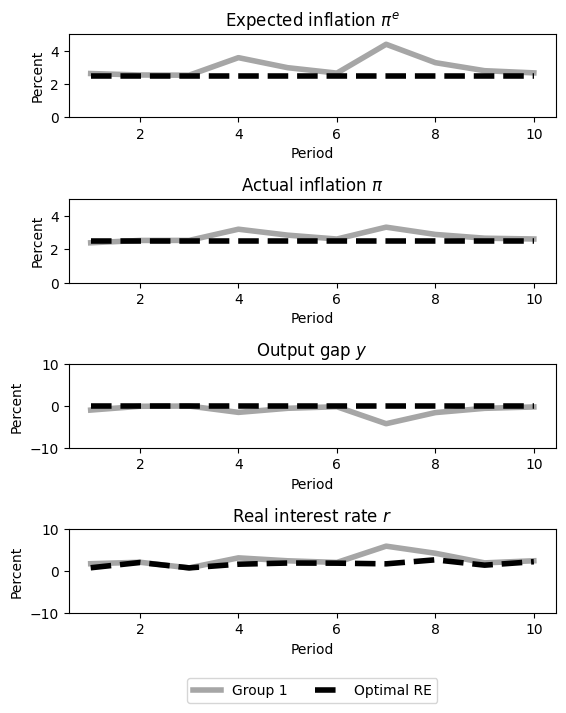

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

scale = 0.48
fig = plt.figure(figsize=(12*scale, 16*scale))

ax0 = fig.add_subplot(1,1,1)
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax0.set_frame_on(False)
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)

# only the inflation‑targeting group (here Group 1)
groups = [1]
colors = ['k']

x = np.arange(1, 11)

for k, g in enumerate(groups):
    ax0.plot(0, 0, lw=4, alpha=0.35, color=colors[k], label=f'Group {g}')
    mask = (data_target['Group'] == g) & (data_target['piE'] == -1)
    ax1.plot(x, data_target.loc[mask, 'piEAvg'],   lw=4, alpha=0.35, color=colors[k])
    ax2.plot(x, data_target.loc[mask, 'piActual'], lw=4, alpha=0.35, color=colors[k])
    ax3.plot(x, data_target.loc[mask, 'y'],        lw=4, alpha=0.35, color=colors[k])
    ax4.plot(x, data_target.loc[mask, 'r'],        lw=4, alpha=0.35, color=colors[k])

# baseline: Optimal RE
piStar = 2.5
ax0.plot(0, 0,       'k--', lw=4, alpha=1, label='Optimal RE')
ax1.plot(x, piStar + 0*x, '--k', lw=4, alpha=1)
ax2.plot(x, piStar + 0*x, '--k', lw=4, alpha=1)
ax3.plot(x,      0 + 0*x, '--k', lw=4, alpha=1)
mean_rRE = data_target[data_target['piE']==-1].groupby('Period')['rRE'].mean()
ax4.plot(x, mean_rRE.values, '--k', lw=4, alpha=1)

ax0.legend(ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.10))

ax1.set_title('Expected inflation $\\pi^e$')
ax2.set_title('Actual inflation $\\pi$')
ax3.set_title('Output gap $y$')
ax4.set_title('Real interest rate $r$')

for ax in (ax1, ax2, ax3, ax4):
    ax.set_xlabel('Period')
    ax.set_ylabel('Percent')

ax1.set_ylim([0, 5])
ax2.set_ylim([0, 5])
ax3.set_ylim([-10, 10])
ax4.set_ylim([-10, 10])

fig.tight_layout()
plt.savefig('fig_discussion_example_target_group1.png', bbox_inches='tight', dpi=120)
plt.show()


## Individual Expectations vs. Actual Inflation and Optimal RE

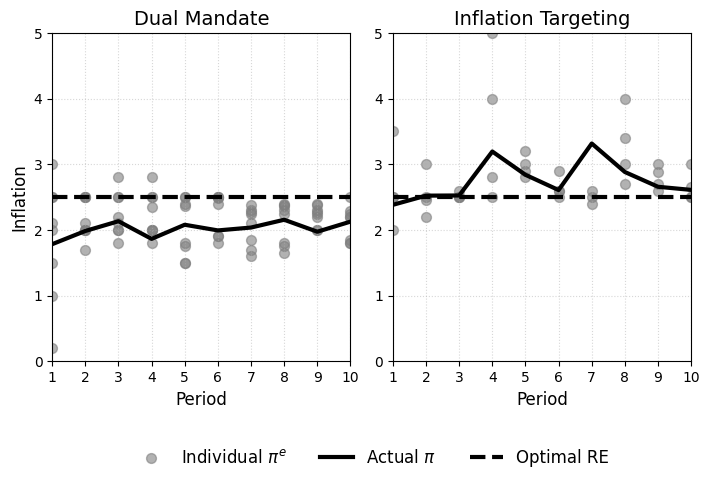

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Parameters
piStar = 2.5
periods = np.arange(1, 11, dtype=int)

# Prepare figure (wider and taller for better readability)
fig = plt.figure(figsize=(12 * 0.6, 8 * 0.75))

# Invisible axis for shared legend
leg_ax = fig.add_subplot(1, 1, 1)
leg_ax.set_frame_on(False)
leg_ax.get_xaxis().set_visible(False)
leg_ax.get_yaxis().set_visible(False)

# Subplots for dual and targeting regimes
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

for ax, (frame, title) in zip([ax1, ax2],
                              [(data_dual, 'Dual Mandate'),
                               (data_target, 'Inflation Targeting')]):

    # Filter out central bankers (piE == -1)
    mask_ind = frame['piE'] != -1

    # Plot individual expectations
    ax.scatter(
        frame.loc[mask_ind, 'Period'],
        frame.loc[mask_ind, 'piE'],
        color='gray', alpha=0.6, s=50,
        label='Individual $\\pi^e$'
    )

    # Plot mean actual inflation
    mean_pi = frame.groupby('Period')['piActual'].mean().reindex(periods)
    ax.plot(
        periods, mean_pi.values,
        '-k', lw=3, label='Actual $\\pi$'
    )

    # Plot optimal RE target line
    ax.plot(
        periods, [piStar] * len(periods),
        '--k', lw=3, label='Optimal RE'
    )

    # Axis labels, limits, grid
    ax.set_title(title, fontsize=14, fontweight='normal')
    ax.set_xlabel('Period', fontsize=12)
    if ax is ax1:
        ax.set_ylabel('Inflation', fontsize=12)
    ax.set_xlim(1, 10)
    ax.set_ylim(0, 5)
    ax.grid(True, linestyle=':', alpha=0.5)

    # Integer ticks only
    ax.xaxis.set_major_locator(mticker.FixedLocator(periods))
    ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.0f}'))

# Shared legend below
handles, labels = ax1.get_legend_handles_labels()
leg_ax.legend(
    handles, labels, loc='upper center',
    bbox_to_anchor=(0.5, -0.22),  # further below
    ncol=3, frameon=False, fontsize=12
)

# Layout with space for the legend
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig('fig_pi_expectations_comparison.png', bbox_inches='tight', dpi=120)
plt.show()


## Construct cumulative frequences for average central bank decision time

In [ ]:
# Periods 1 - 5
avg_times_dual   = 30 - data_dual[(data_dual.CB == True) & (data_dual.Period < 6)] \
                        .groupby('Subject')['TimeOKCentralBankChoiceOK'] \
                        .mean()
avg_times_target = 30 - data_target[(data_target.CB == True) & (data_target.Period < 6)] \
                        .groupby('Subject')['TimeOKCentralBankChoiceOK'] \
                        .mean()

times            = np.arange(0, 120, 0.1)
freq_dual_1_5   = 0 * times
freq_target_1_5 = 0 * times
freq_dual_6_10  = 0 * times
freq_target_6_10= 0 * times

for i, t in enumerate(times):
    freq_dual_1_5[i]   = len(np.where(avg_times_dual   < t)[0]) / len(avg_times_dual)
    freq_target_1_5[i] = len(np.where(avg_times_target < t)[0]) / len(avg_times_target)

# Periods 6 - 10
avg_times_dual   = 30 - data_dual[(data_dual.CB == True) & (data_dual.Period > 5)] \
                        .groupby('Subject')['TimeOKCentralBankChoiceOK'] \
                        .mean()
avg_times_target = 30 - data_target[(data_target.CB == True) & (data_target.Period > 5)] \
                        .groupby('Subject')['TimeOKCentralBankChoiceOK'] \
                        .mean()

for i, t in enumerate(times):
    freq_dual_6_10[i]   = len(np.where(avg_times_dual   < t)[0]) / len(avg_times_dual)
    freq_target_6_10[i] = len(np.where(avg_times_target < t)[0]) / len(avg_times_target)


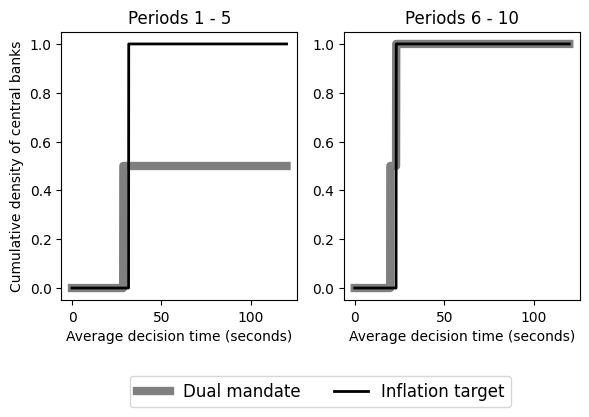

In [ ]:
import matplotlib.pyplot as plt

scale = 0.5
fig = plt.figure(figsize=(scale*12, scale*10))

# Invisible axes for legend
ax0 = fig.add_subplot(1,1,1)
ax0.set_frame_on(False)
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
# Legend entries: Dual mandate vs. Inflation target
ax0.plot(0, 0, 'k',   lw=6, alpha=0.5)
ax0.plot(0, 0, '-k',  lw=2, alpha=1)
ax0.legend(['Dual mandate', 'Inflation target'],
           fontsize=12, loc=9, bbox_to_anchor=(0.5, -0.25), ncol=2)

# Periods 1–5 panel
ax1 = fig.add_subplot(1,2,1)
ax1.plot(times, freq_dual_1_5,   'k', lw=6, alpha=0.5)
ax1.plot(times, freq_target_1_5, 'k', lw=2)
ax1.set_xlabel('Average decision time (seconds)')
ax1.set_ylabel('Cumulative density of central banks')
ax1.set_title('Periods 1 - 5')

# Periods 6–10 panel
ax2 = fig.add_subplot(1,2,2)
ax2.plot(times, freq_dual_6_10,   'k', lw=6, alpha=0.5)
ax2.plot(times, freq_target_6_10, 'k', lw=2)
ax2.set_xlabel('Average decision time (seconds)')
ax2.set_title('Periods 6 - 10')

fig.tight_layout()
plt.savefig('fig_cb_decision_times_uniform_groups.png',
            bbox_inches='tight', dpi=120)
plt.show()
